# PHYS 434 HW5 Angela Zhou

In [1]:
# import the libraries
%matplotlib inline
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import hist
from matplotlib.pyplot import xticks
import scipy
from scipy import stats
from scipy.stats import norm

Bayes' Theorem: <br>
$$P(signal|data) = \frac{P(data|signal)P(signal)}{P(data)}$$ <br>
Reading through Bayes' theorem it says that given a data reading, the probability it was produced by a given true signal (P(signal|data)), is equal to the probability of getting a particular data reading given a certain true signal (P(data|signal)) times the probability of the signal having a particular strength (P(signal)), divided by the probability of each data reading  (P(data)). <br>
The goal of this homework is to find P(signal|data). <br>
- P(signal|data)  is what we want to know. What was the probability distribution of the true signal given the measurement we have? Unfortunately it is hard to calculate from first principles. 
- P(data|signal) Is usually easy to determine. If we have a signal-free background (see first 4 weeks of this class), we can inject fake signals of known strength and then simulate the observations in the presence of known (fake) signals. This means we can easily generate P(data|signal).
- P(signal) is called a prior. It is the probability the signal has a particular strength. Priors can be used to great effect, such as in combining the results of multiple particle physics experiments. But it is also the source of 90\% of all statistical mistakes. It is incredibly dangerous. Almost all of the time—and always in this class—we will want a weak/uniform prior. One of the most dangerous bits of using Bayes' Theorem is that it is easy to have an implicit prior which will give you the wrong answer and you don't know why. 
- P(data) in the denominator is almost always just a normalization factor, and is often dropped. This means the result will have to be renormalized, usually by making sure the full P(signal|data) integrates to one.

## Problem 1

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  σ , say in the range 2-5. Create a million background events. <br>
Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  P(signal)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad). <br>
Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  P(data|signal)P(signal). <br>
Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it. 

In [2]:
## create background and signal

# background
bkgd_1 = norm.rvs(loc = 0, scale = 3, size = 1000000)

# signal
signal_1 = np.random.uniform(0,20,1000000)

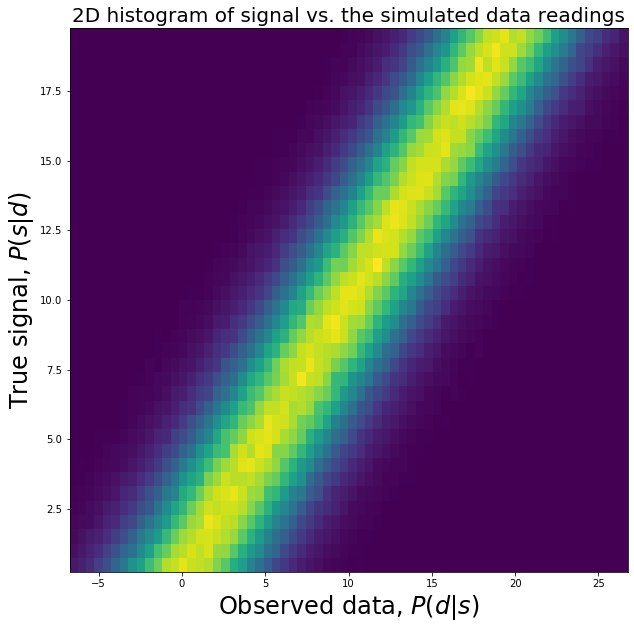

In [3]:
plt.rcParams["figure.figsize"] = (10,10)
data_1 = bkgd_1 + signal_1

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data_1,signal_1, bins=[dataedges,signaledges], density=True);

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T);
plt.ylabel('True signal, $P(s|d)$', fontsize = 24);
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);
plt.title("2D histogram of signal vs. the simulated data readings", fontsize = 20);

### Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

## Problem 1b
### Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]
The true injected signal I picked is 15.

In [4]:
# print(data_1)
# print(signal_1)
# print()
# print(datacenters)
# print(signalcenters)
# print()
print(Psd.shape)

(67, 39)


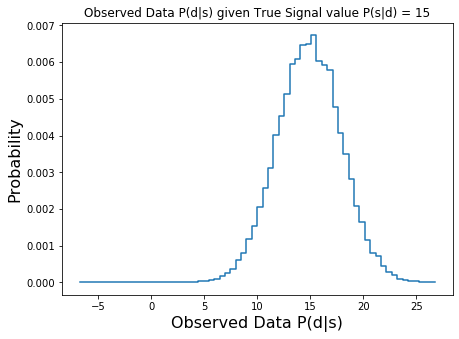

In [5]:
plt.rcParams["figure.figsize"] = (7,5)
value = 15

# find the bin of true signal = 15
ybin = np.digitize(value, signalcenters)

# extract the data for that specific strip
horizontalStripe_1 = Psd[:,ybin]
# print(horizontalStripe_1)
plt.step(datacenters,horizontalStripe_1);
plt.title("Observed Data P(d|s) given True Signal value P(s|d) = 15");
plt.xlabel("Observed Data P(d|s)", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);

The plot above plots the Observed Data P(d|s) for True Signal value P(s|d) = 15 with a zero-mean gaussian distribution as the background. This would be a horizontal strip at y = 15 on the 2D histogram plotted above. P(d|s) is the probability of getting a particular data reading given a certain true signal, true signal = 15 in this case. <br>
We can see that this plot is symmetric and is centered at x = 15. This tells us the probability of getting a data reading of 15 is the highest given that true signal = 15. 

## Problem 1c
### Select an observed data value and plot  P(s|d) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

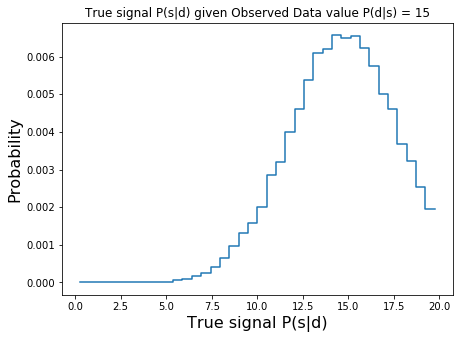

In [6]:
# find the bin of true signal = 15
xbin = np.digitize(value, datacenters)

# extract the data for that specific strip
verticalStripe_1 = Psd[xbin,:]
# print(verticalStripe_1)
plt.step(signalcenters,verticalStripe_1);
plt.title("True signal P(s|d) given Observed Data value P(d|s) = 15");
plt.xlabel("True signal P(s|d)", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);

The plot above plots the True Signal P(s|d) for Observed Data value P(d|s) = 15 with a zero-mean gaussian distribution as the background. This would be a vertical strip at x = 15 on the 2D histogram plotted above. P(s|d) is the probability of the true signal given the measurement value of 15. <br>
We can see that this plot is relatively symmetric and is also centered at x = 15. This tells us the probability that a data reading of 15 is produced by a true signal value of 15 is the highest among all the true signal values. 

## Problem 2
### Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above. Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.
I chose to move the new background by 3σ from the previous zero-mean gaussian distribution background. σ is 3 in both backgrounds, I moved the mean of the Gaussian distribution background from problem 1 to the right by 9. <br>
I am still picking 15 as my true signal.

In [7]:
## create background and signal
# background
bkgd_2 = norm.rvs(loc = 9, scale = 3, size = 1000000)
# signal
signal_2 = np.random.uniform(0,20,1000000)

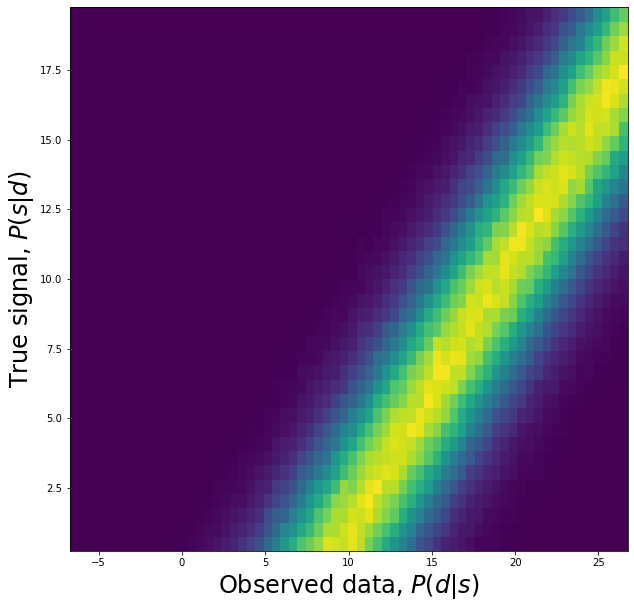

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
data_2 = bkgd_2 + signal_2

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd_2, temp, temp2= np.histogram2d(data_2,signal_2, bins=[dataedges,signaledges], density=True);

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd_2.T);
plt.ylabel('True signal, $P(s|d)$', fontsize = 24);
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24);

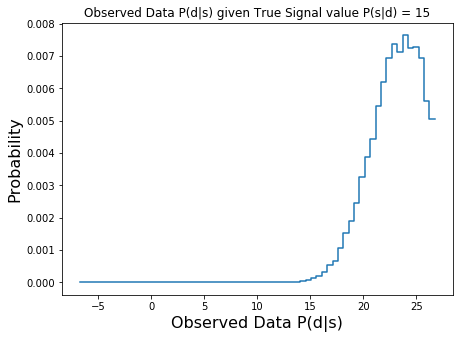

In [9]:
plt.rcParams["figure.figsize"] = (7,5)

horizontalStripe_2 = Psd_2[:,ybin]
# print(horizontalStripe_2)
plt.step(datacenters,horizontalStripe_2);
plt.title("Observed Data P(d|s) given True Signal value P(s|d) = 15");
plt.xlabel("Observed Data P(d|s)", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);

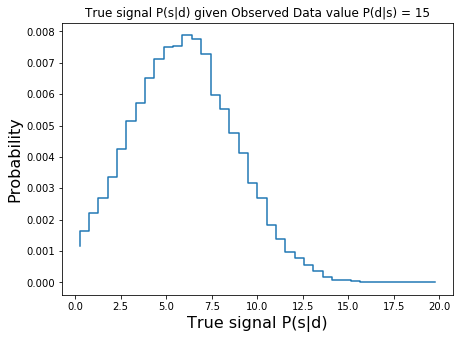

In [10]:
verticalStripe_2 = Psd_2[xbin,:]
# print(verticalStripe)
plt.step(signalcenters,verticalStripe_2);
plt.title("True signal P(s|d) given Observed Data value P(d|s) = 15");
plt.xlabel("True signal P(s|d)", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);

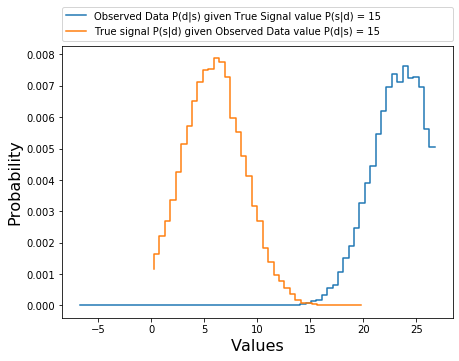

In [11]:
plt.step(datacenters,horizontalStripe_2, label = "Observed Data P(d|s) given True Signal value P(s|d) = 15");
plt.step(signalcenters,verticalStripe_2, label = "True signal P(s|d) given Observed Data value P(d|s) = 15");
plt.legend(bbox_to_anchor=(0,1.02,1,0.2), loc="lower left",mode="expand", borderaxespad=0, ncol=1);
plt.xlabel("Values", fontsize = 16);
plt.ylabel("Probability", fontsize = 16);

In [12]:
## find centers 
# P(d|s)
index_horizontal = np.where(horizontalStripe_2 == np.max(horizontalStripe_2))[0][0]
pk_horizontal = datacenters[index_horizontal]

# p(s|d)
index_vertical = np.where(verticalStripe_2 == np.max(verticalStripe_2))[0][0] # the index where it's the peak
pk_vertical = signalcenters[index_vertical]

print("P(s|d) is the highest at x = " + str(pk_horizontal))
print("P(d|s) is the highest at x = " + str(pk_vertical))

P(s|d) is the highest at x = 24.2089552238806
P(d|s) is the highest at x = 6.41025641025641


The plot above plots both P(d|s) and P(s|d). We can see that unlike problem 1, both curves are less symmetric within the given region, and P(d|s) and P(s|d) are no longer centered at the same value. P(s|d) is centered at around value = 24 and P(d|s) is centered at around value = 6. <br>
$Signal = true\, signal\, +\, background\, with\, background = original\, background\, +\, injected\, signal$ <br>
In this problem, we injected a signal of known strength 3σ to the original background and created a new background distribution by shifting the mean of the original background by 3σ whereas in problem 1 the background is just the original zero-mean gaussian distributed background with 0 injected signal. <br>
I set σ to be 3 for the original background distribution so 3σ = 9. <br>
P(d|s) is the probability of getting a particular data reading given a certain true signal, therefore, the mean of P(d|s) = mean of signal + mean of background $\approx$  15 + 9 = 24. <br>
P(s|d) is the probability distribution of the true signal given the measurement we have, therefore, the mean of P(s|d) = mean of signal - mean of background $\approx$  15 - 9 = 6. <br>
In problem 1, both P(d|s) and P(s|d) curves are centered at around value = 15 because the background distribution for problem 1 has zero-mean.